# Image and language processing - Homework 3
## Sander Tars

### Exercise 1

#### What does name the pixel in the 3D dimension?

The third dimension is the channel, for example in RGB, it means red channel, green channel, blue channel.

#### Mention to the common formats of an image. Add some explanation to each one.

The two most common formats are RGB and CMYK. RGB means red-green-blue and CMYK means cyan-magenta-yellow-black - these are the colors that these formats are comprised of. Usually RGB is used in digital materials and CMYK in print materials.

#### Express two most principal duty of image processing techniques?

Noise removal - noise perturbs both observing and analysing the images.

Edge detection - edges are important to distinguish between objects. Distinguishing between objects is very important for image processing and analysing.

#### What is DIP? How many level has it? Please explain.

Assuming that DIP is Digital image processing. The levels of DIP can be basically divided into 4 levels.

Level 1 - Image representation (sampling, quantization, etc.)

Level 2 - Image transformations (enhancement, segmentation, etc.)

Level 3 - Parameter transformations (feature selection)

Level 4 - Information extraction (recognition, interpretation).

#### What is the “sampling”?

Sampling is digitizing the coordinate values (x and y values). Basically taking samples from the image xy signal.

#### What is the “spatial resolution”?

Spatial resolution shows how closely lines can be resolved in an image. A simpler explanation would be that spatial resolution defines the clarity of the image.

#### What show the “intensity level resolution”?

Intensity level resolution is the number of intensity levels used to represent the image.
The more intensity levels are used, the finer the level of detail distinguishable in an image.

#### What is the “image enhancement”?

Image enhancement is basically improving the quality of the image, this includes noise removal, illumination, etc.

#### What are the steps of the Canny edge detector?

1. Apply Gaussian filter to smooth the image in order to remove the noise
2. Find the intensity gradients of the image
3. Non-maximum suppression is applied. This removes pixels that are not considered to be part of an edge. Hence, only thin lines (candidate edges) will remain.
4. Apply upper and lower threshold to determine potential edges - higher than upper threshold means strong edge, lower than lower mean no edge.
5. Finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges.

#### Explain about LAB XYZ, RGB format of images separately.

RGB format - image consists of three channels - red, green and clue, which make up the whole image (coloured image).

LAB format - describes all perceivable colors in the three dimensions - L for lightness, and A and B for the color opponents green–red and blue–yellow

XYZ format - in this format Y is defined as luminance. For any given Y value, the XZ plane will contain all possible chromaticities at that luminance.


### Exercise 2

To get a simplest decision tree, I chose the first attribute to be A, because it covers all of the yes cases. In case A is No, then attribute B explains all of the training samples. I ended up with the following decision tree:

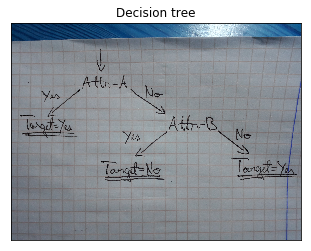

In [70]:
# described in code
# if attr-A:
#     return Yes
# else: 
#     if attr-B:
#         return No
#     else:
#         return Yes

# described on an image
import imutils
img = cv2.imread('dtree.jpg')
plt.imshow(imutils.rotate_bound(img, -90)),plt.title('Decision tree')
plt.xticks([]), plt.yticks([])
plt.show()

So to predict samples 7 and 8:

7. Attr-A = No -> Attr-B = Yes => Target=No

8. Attr-A = No -> Attr-B = No => Target=Yes

### Exercise 3

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from time import time

# 1. Load an image into the workspace of the software.
img = cv2.imread('forest2.jpeg')

In [2]:
# 2. Convert the image to grayscale.
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [10]:
# 3. Resize the grayscale image to 50*50.
small_gray_img = cv2.resize(gray_img, (50,50))

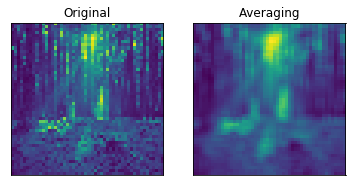

[[ 0.1  0.1  0.1]
 [ 0.1  0.1  0.1]
 [ 0.1  0.1  0.1]]


In [24]:
# 4. Apply filter 1
kernel = np.ones((3,3),np.float32)/10
dst = cv2.filter2D(small_gray_img,-1,kernel)

plt.subplot(121),plt.imshow(small_gray_img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()
print(kernel)

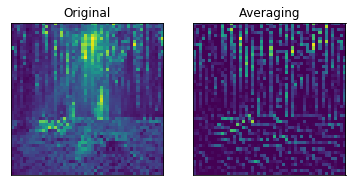

[[ 0.  0.  1.]
 [ 0. -2.  0.]
 [ 1.  0.  0.]]


In [26]:
# 4. Apply filter 2
kernel = np.ones((3,3),np.float32)
kernel[0,0] = 0
kernel[0,1] = 0
kernel[1,0] = 0
kernel[1,1] = -2
kernel[2,2] = 0
kernel[2,1] = 0
kernel[1,2] = 0
dst = cv2.filter2D(small_gray_img,-1,kernel)

plt.subplot(121),plt.imshow(small_gray_img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()
print(kernel)

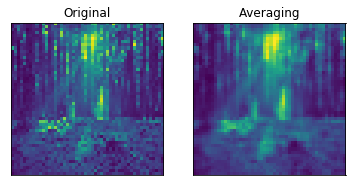

[[ 0.          0.2         0.        ]
 [ 0.2         0.40000001  0.2       ]
 [ 0.          0.2         0.        ]]


In [28]:
# 4. Apply filter 3
kernel = np.ones((3,3),np.float32)/5
kernel[0,0] = 0
kernel[0,2] = 0
kernel[2,0] = 0
kernel[2,2] = 0
kernel[1,1] *= 2
dst = cv2.filter2D(small_gray_img,-1,kernel)

plt.subplot(121),plt.imshow(small_gray_img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()
print(kernel)

The first kernel just takes the signal of 3x3 area and averages it to 1/10 of the squares in the 3x3 area, this way we end up with a blurry image.

The second kernel takes the two diagonal squares (marked as 1) and substracts the center square. Using this kernel we end up with a really weird tetris-like image.

The third kernel uses signals from left-right, up-down squares to support the middle one and averages it to blurry image, which looks really similar to the first kernel.

### Exercise 4

In [46]:
# 1. Load an image into the workspace of the software.
img = cv2.imread('forest2.jpeg')
# 2. Convert the image to grayscale.
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 3. Resize the grayscale image to 255*255.
small_gray_img = cv2.resize(gray_img, (255,255))

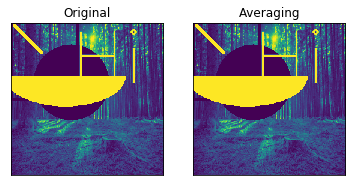

In [47]:
# 4. draw a line, rectangle,circle,ellipse, text
# Draw a diagonal blue line with thickness of 5 px
img = cv2.line(small_gray_img,(0,0),(50,50),(255,0,0),5)

img = cv2.rectangle(img,(0,0),(110,128),(0,255,0),3)

img = cv2.circle(img,(100,100), 63, (0,0,255), -1)

img = cv2.ellipse(img,(90,90),(100,50),0,0,180,255,-1)

font = cv2.FONT_HERSHEY_SIMPLEX
img = cv2.putText(img,'Hi',(100,100), font, 4,(255,255,255),2,cv2.LINE_AA)

plt.subplot(121),plt.imshow(small_gray_img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

# Just to show how these things can be used.

In [48]:
# write the image we just drew on
cv2.imwrite("drew_on.jpeg", img)

True

In [57]:

# 1. Load an image into the workspace of the software.
img = cv2.imread('forest2.jpeg')
# access pixel values and modify with 
# array.itme() -- access

print("Pixel value before modifying")
print(img.item(10,10,2))

# array.itemset() -- modify

img.itemset((10,10,2),100)
print("Pixel value after modifying")
print(img.item(10,10,2))

# img.shape() -- get shape
print("Shape of the image")
print(img.shape)

# img.size()
print("Size of the image")
print(img.size)

Pixel value before modifying
5
Pixel value after modifying
100
Shape of the image
(420, 630, 3)
Size of the image
793800


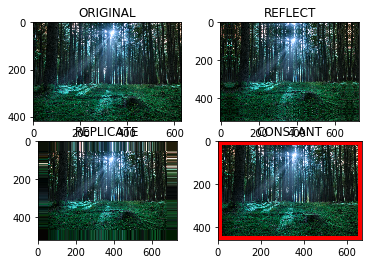

In [63]:
# make the borders for image by using cv2.copyMakeBorder(), 
# using different arguments of cv2.border_constant, cv2.border_refltect

RED = [255,0,0]

img1 = cv2.imread('forest2.jpeg')

# Reflects - can see easily from double sun
reflect = cv2.copyMakeBorder(img1,50,50,50,50,cv2.BORDER_REFLECT)

# Replicates - can see from the fuzzy border
replicate = cv2.copyMakeBorder(img1,50,50,50,50,cv2.BORDER_REPLICATE)

# Creates the specified value  border
constant= cv2.copyMakeBorder(img1,20,20,20,20,cv2.BORDER_CONSTANT,value=RED)

plt.subplot(221),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(222),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(223),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(224),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

### Exercise 5

In [37]:
# 1. Load an image into the workspace of the software.
img = cv2.imread('forest2.jpeg')

In [38]:
# 2. Convert the image to grayscale.
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [39]:
# 3. Resize the grayscale image to 255*255.
small_gray_img = cv2.resize(gray_img, (255,255))

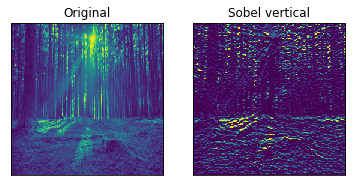

[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


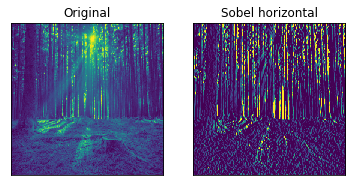

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]


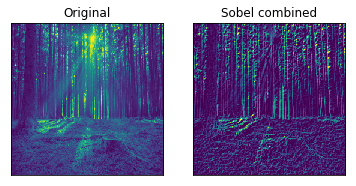

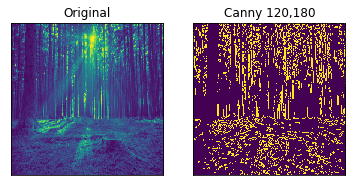

In [40]:
# Basically constructed sobel edge detectors

# kernel for detecting veritcal edges
kernel = np.zeros((3,3),np.float32)
kernel[0,0] = -1
kernel[0,1] = -2
kernel[0,2] = -1
kernel[2,0] = 1
kernel[2,1] = 2
kernel[2,2] = 1
dst_y = cv2.filter2D(small_gray_img,-1,kernel)

plt.subplot(121),plt.imshow(small_gray_img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst_y),plt.title('Sobel vertical')
plt.xticks([]), plt.yticks([])
plt.show()
print(kernel)
# kernel for detecting horisontal edges
kernel_v = kernel.T
dst_x = cv2.filter2D(small_gray_img,-1,kernel_v)

plt.subplot(121),plt.imshow(small_gray_img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst_x),plt.title('Sobel horizontal')
plt.xticks([]), plt.yticks([])
plt.show()
print(kernel_v)

# combine sobel x and y
abs_grad_x = cv2.convertScaleAbs(dst_x)
abs_grad_y = cv2.convertScaleAbs(dst_y)

dst = cv2.addWeighted(abs_grad_x,0.5,abs_grad_y,0.5,0)

plt.subplot(121),plt.imshow(small_gray_img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Sobel combined')
plt.xticks([]), plt.yticks([])
plt.show()

# compare with canny
canny_k = cv2.Canny(small_gray_img, 120, 180)
plt.subplot(121),plt.imshow(small_gray_img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(canny_k),plt.title('Canny 120,180')
plt.xticks([]), plt.yticks([])
plt.show()

As we can see, the combined Sobel X,Y detects edges quite well (even very detailed edges, with these settings).

The Canny also detects edges, the lower- and upper threshold can be palyed with, but the general picture still looks the same.

As we see from the comparison, Sobel does not remove the background entirely, giving the picture a more natural feeling, whereas canny removes the background entirely, making it probably better usable in image processing.